# Pokémon Data Analysis
<hr />
<figure>
    <figcaption>Oak Research Lab theme</figcaption>
    <audio
        controls
        src="./oak_research_lab.mp3">
            Your browser does not support the
            <code>audio</code> element.
    </audio>
    <img src='./g1_pokedex.png'
</figure>

In [441]:
# load basic resources
import pandas
import numpy
import seaborn

pkmn = pandas.read_csv("./pokemon.csv")

In [442]:
# check out basic dataframe structure
pkmn.head(8)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0


<h2 style='color:#555'>Information Overload</h2>
Wow, that's a lot of columns! That's information overload right there. There's so many columns that pandas decided to have an ellipses to collapse the center bits of information... The question is: do we really need all these columns? To answer that, let's review the header information first.

In [443]:
# what type of data might we have here?
list(pkmn.columns.values)

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

In [444]:
# Hmmm... I'm not interested in damage 'against' other types.
# Pokémon can know many attacks of different types!
pkmn = pkmn.drop([
	'against_bug',
	'against_dark',
	'against_dragon',
	'against_electric',
	'against_fairy',
	'against_fight',
	'against_fire',
	'against_flying',
	'against_ghost',
	'against_grass',
	'against_ground',
	'against_ice',
	'against_normal',
	'against_poison',
	'against_psychic',
	'against_rock',
	'against_steel',
	'against_water',
	'base_total'
], 1)

<h2 style='color:#555'>Data Accuracy</h2>
A data scientist must always be a skeptic. As such, I am skeptical of the data I'm provided! I doubt its 100% right. It can't be! First I bet there's missing data entries. Next I bet that some data is not even correct. There is not much I can do about that second part, but atleast I can consider some interesting points, like a Pokémon's Pokédex number.

In [445]:
# checking the order of pokémon in the dataframe
assert pkmn['name'][0] == 'Bulbasaur', 'The first pokémon in the pokédex is not Bulbasaur!'
assert pkmn['name'][1] == 'Ivysaur', 'The second pokémon in the pokédex is not Ivysaur!'
assert pkmn['name'][2] == 'Venusaur', 'The third pokémon in the pokédex is not Venusaur!'
assert pkmn['name'][150] == 'Mew', 'The 151st pokémon in the pokédex is not Mew!'

print('It seems that pokémon in this dataset are ordered by their original pokédex number.')

It seems that pokémon in this dataset are ordered by their original pokédex number.


In [446]:
# how many pokemon are there in this dataset?
pkmn['pokedex_number'].count()

801

Looks like there are a few pokemon missing from this dataset...seven, to be precise, according to bulbapedia, the pokémon encyclopedia. But which pokémon are missing?

In [447]:
pkmn['name'].tail(8)

793      Buzzwole
794     Pheromosa
795     Xurkitree
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, dtype: object

It seems like the last 8 pokemon are the only ones missing from this dataset.

| #   | Pokémon     |
|-----|-------------|
| 802 | Marshadow   |
| 803 | Poipole     |
| 804 | Naganadel   |
| 805 | Stakataka   |
| 806 | Blacephalon |
| 807 | Zeraora     |
| 808 | Meltan      |
| 809 | Melmetal    |

I bet that these pokémon weren't out yet when the dataset was released to the public, and that it just hasn't been updated. For our purposes, that's OK. We'll just keep that in mind as we move forward.

<h2 style='color:#555'>Cleaning Dirty Data 💩</h2>
Second rule of data science: your data stinks! My data stinks! How can we clean it up? Well, if we look through the data, then the points of interest will become apparent.

In [448]:
# some of the columns are scattered about, it'd be nice to have them clustered.
pkmn['stats_attack'] = pkmn['attack']
pkmn['stats_defense'] = pkmn['defense']
pkmn['stats_special_attack'] = pkmn['sp_attack']
pkmn['stats_special_defense'] = pkmn['sp_defense']
pkmn['stats_hp'] = pkmn['hp']
pkmn['stats_speed'] = pkmn['speed']

# drop redundant data now
pkmn = pkmn.drop([
	'attack',
	'defense',
	'sp_attack',
	'sp_defense',
	'hp',
	'speed'
], 1)

In [449]:
# consolidate pokémon row types
def consolidate_types(type_1, type_2):
	if not pandas.isna(type_1) and not pandas.isna(type_2):
		return [type_1, type_2]
	elif not pandas.isna(type_1) and pandas.isna(type_2):
		return [type_1]
	elif pandas.isna(type_1) and not pandas.isna(type_2):
		return [type_2]
	else:
		return []

# iterating over two columns, uses 'zip' for speed
pkmn['type'] = [consolidate_types(type_1, type_2) for type_1, type_2 in zip(pkmn['type1'], pkmn['type2'])]

# drop redundant data now
pkmn = pkmn.drop([
	'type1',
	'type2'
], 1)

In [450]:
# check out the new data
pkmn.head(8)

,abilities,base_egg_steps,base_happiness,capture_rate,classfication,experience_growth,height_m,japanese_name,name,percentage_male,...,weight_kg,generation,is_legendary,stats_attack,stats_defense,stats_special_attack,stats_special_defense,stats_hp,stats_speed,type
0,"['Overgrow', 'Chlorophyll']",5120,70,45,Seed Pokémon,1059860,0.7,Fushigidaneフシギダネ,Bulbasaur,88.1,...,6.9,1,0,49,49,65,65,45,45,"[grass, poison]"
1,"['Overgrow', 'Chlorophyll']",5120,70,45,Seed Pokémon,1059860,1.0,Fushigisouフシギソウ,Ivysaur,88.1,...,13.0,1,0,62,63,80,80,60,60,"[grass, poison]"
2,"['Overgrow', 'Chlorophyll']",5120,70,45,Seed Pokémon,1059860,2.0,Fushigibanaフシギバナ,Venusaur,88.1,...,100.0,1,0,100,123,122,120,80,80,"[grass, poison]"
3,"['Blaze', 'Solar Power']",5120,70,45,Lizard Pokémon,1059860,0.6,Hitokageヒトカゲ,Charmander,88.1,...,8.5,1,0,52,43,60,50,39,65,[fire]
4,"['Blaze', 'Solar Power']",5120,70,45,Flame Pokémon,1059860,1.1,Lizardoリザード,Charmeleon,88.1,...,19.0,1,0,64,58,80,65,58,80,[fire]
5,"['Blaze', 'Solar Power']",5120,70,45,Flame Pokémon,1059860,1.7,Lizardonリザードン,Charizard,88.1,...,90.5,1,0,104,78,159,115,78,100,"[fire, flying]"
6,"['Torrent', 'Rain Dish']",5120,70,45,Tiny Turtle Pokémon,1059860,0.5,Zenigameゼニガメ,Squirtle,88.1,...,9.0,1,0,48,65,50,64,44,43,[water]
7,"['Torrent', 'Rain Dish']",5120,70,45,Turtle Pokémon,1059860,1.0,Kameilカメール,Wartortle,88.1,...,22.5,1,0,63,80,65,80,59,58,[water]


This is strange. I notice how the abilities row is showing the contents as strings...whereas, the type column does not denote the apostrophes. I bet that the whole array is a string, as in the string is "['Overgrow', 'Chlorophyll']"

In [451]:
pkmn.dtypes

abilities                 object
base_egg_steps             int64
base_happiness             int64
capture_rate              object
classfication             object
experience_growth          int64
height_m                 float64
japanese_name             object
name                      object
percentage_male          float64
pokedex_number             int64
weight_kg                float64
generation                 int64
is_legendary               int64
stats_attack               int64
stats_defense              int64
stats_special_attack       int64
stats_special_defense      int64
stats_hp                   int64
stats_speed                int64
type                      object
dtype: object

In [452]:
pkmn['abilities']

0                            ['Overgrow', 'Chlorophyll']
1                            ['Overgrow', 'Chlorophyll']
2                            ['Overgrow', 'Chlorophyll']
3                               ['Blaze', 'Solar Power']
4                               ['Blaze', 'Solar Power']
5                               ['Blaze', 'Solar Power']
6                               ['Torrent', 'Rain Dish']
7                               ['Torrent', 'Rain Dish']
8                               ['Torrent', 'Rain Dish']
9                            ['Shield Dust', 'Run Away']
10                                         ['Shed Skin']
11                       ['Compoundeyes', 'Tinted Lens']
12                           ['Shield Dust', 'Run Away']
13                                         ['Shed Skin']
14                                   ['Swarm', 'Sniper']
15             ['Keen Eye', 'Tangled Feet', 'Big Pecks']
16             ['Keen Eye', 'Tangled Feet', 'Big Pecks']
17             ['Keen Eye', 'Ta

In [453]:
# consolidate pokémon row types
def verify_string_array(entry):
	if isinstance(entry, str):
		entry = entry.lower()
		entry = entry.replace('[','')
		entry = entry.replace(']','')
		entry = entry.replace('\'','')
		entry = str.split(entry, ", ")
		return entry
	else:
		return entry

pkmn['abilities'] = [verify_string_array(entry) for entry in pkmn['abilities']]

In [454]:
pkmn['abilities']

0                                [overgrow, chlorophyll]
1                                [overgrow, chlorophyll]
2                                [overgrow, chlorophyll]
3                                   [blaze, solar power]
4                                   [blaze, solar power]
5                                   [blaze, solar power]
6                                   [torrent, rain dish]
7                                   [torrent, rain dish]
8                                   [torrent, rain dish]
9                                [shield dust, run away]
10                                           [shed skin]
11                           [compoundeyes, tinted lens]
12                               [shield dust, run away]
13                                           [shed skin]
14                                       [swarm, sniper]
15                   [keen eye, tangled feet, big pecks]
16                   [keen eye, tangled feet, big pecks]
17                   [keen eye,

In [455]:
pkmn.head(8)

,abilities,base_egg_steps,base_happiness,capture_rate,classfication,experience_growth,height_m,japanese_name,name,percentage_male,...,weight_kg,generation,is_legendary,stats_attack,stats_defense,stats_special_attack,stats_special_defense,stats_hp,stats_speed,type
0,"[overgrow, chlorophyll]",5120,70,45,Seed Pokémon,1059860,0.7,Fushigidaneフシギダネ,Bulbasaur,88.1,...,6.9,1,0,49,49,65,65,45,45,"[grass, poison]"
1,"[overgrow, chlorophyll]",5120,70,45,Seed Pokémon,1059860,1.0,Fushigisouフシギソウ,Ivysaur,88.1,...,13.0,1,0,62,63,80,80,60,60,"[grass, poison]"
2,"[overgrow, chlorophyll]",5120,70,45,Seed Pokémon,1059860,2.0,Fushigibanaフシギバナ,Venusaur,88.1,...,100.0,1,0,100,123,122,120,80,80,"[grass, poison]"
3,"[blaze, solar power]",5120,70,45,Lizard Pokémon,1059860,0.6,Hitokageヒトカゲ,Charmander,88.1,...,8.5,1,0,52,43,60,50,39,65,[fire]
4,"[blaze, solar power]",5120,70,45,Flame Pokémon,1059860,1.1,Lizardoリザード,Charmeleon,88.1,...,19.0,1,0,64,58,80,65,58,80,[fire]
5,"[blaze, solar power]",5120,70,45,Flame Pokémon,1059860,1.7,Lizardonリザードン,Charizard,88.1,...,90.5,1,0,104,78,159,115,78,100,"[fire, flying]"
6,"[torrent, rain dish]",5120,70,45,Tiny Turtle Pokémon,1059860,0.5,Zenigameゼニガメ,Squirtle,88.1,...,9.0,1,0,48,65,50,64,44,43,[water]
7,"[torrent, rain dish]",5120,70,45,Turtle Pokémon,1059860,1.0,Kameilカメール,Wartortle,88.1,...,22.5,1,0,63,80,65,80,59,58,[water]


In [456]:
list(pkmn.columns.values)

['abilities',
 'base_egg_steps',
 'base_happiness',
 'capture_rate',
 'classfication',
 'experience_growth',
 'height_m',
 'japanese_name',
 'name',
 'percentage_male',
 'pokedex_number',
 'weight_kg',
 'generation',
 'is_legendary',
 'stats_attack',
 'stats_defense',
 'stats_special_attack',
 'stats_special_defense',
 'stats_hp',
 'stats_speed',
 'type']

In [457]:
pkmn = pkmn[[
	'pokedex_number',
	'generation',
	'name',
	'japanese_name',
	'classfication',
	'is_legendary',
	'type',
	'abilities',
	'stats_attack',
	'stats_defense',
	'stats_special_attack',
	'stats_special_defense',
	'stats_hp',
	'stats_speed',
	'base_egg_steps',
	'base_happiness',
	'capture_rate',
	'experience_growth',
	'percentage_male',
	'height_m',
	'weight_kg',
]]

In [458]:
list(pkmn.columns.values)

['pokedex_number',
 'generation',
 'name',
 'japanese_name',
 'classfication',
 'is_legendary',
 'type',
 'abilities',
 'stats_attack',
 'stats_defense',
 'stats_special_attack',
 'stats_special_defense',
 'stats_hp',
 'stats_speed',
 'base_egg_steps',
 'base_happiness',
 'capture_rate',
 'experience_growth',
 'percentage_male',
 'height_m',
 'weight_kg']

I'd like to further clean this data by seperating japanese_name into two columns, but for now this is cleaned well enough. A few other points I noticed were the incorrect gender ratios for pokemon, in that the data truncates decimals past the first point. To that point, it is important to keep in mind this data is just approximate.

# Data Visualization

In [459]:
pkmn.describe()

,pokedex_number,generation,is_legendary,stats_attack,stats_defense,stats_special_attack,stats_special_defense,stats_hp,stats_speed,base_egg_steps,base_happiness,experience_growth,percentage_male,height_m,weight_kg
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,703.000000,781.000000,781.000000
mean,401.000000,3.690387,0.087391,77.857678,73.008739,71.305868,70.911361,68.958801,66.334582,7191.011236,65.362047,1.054996e+06,55.155761,1.163892,61.378105
std,231.373075,1.930420,0.282583,32.158820,30.769159,32.353826,27.942501,26.576015,28.907662,6558.220422,19.598948,1.602558e+05,20.261623,1.080326,109.354766
min,1.000000,1.000000,0.000000,5.000000,5.000000,10.000000,20.000000,1.000000,5.000000,1280.000000,0.000000,6.000000e+05,0.000000,0.100000,0.100000
25%,201.000000,2.000000,0.000000,55.000000,50.000000,45.000000,50.000000,50.000000,45.000000,5120.000000,70.000000,1.000000e+06,50.000000,0.600000,9.000000
50%,401.000000,4.000000,0.000000,75.000000,70.000000,65.000000,66.000000,65.000000,65.000000,5120.000000,70.000000,1.000000e+06,50.000000,1.000000,27.300000
75%,601.000000,5.000000,0.000000,100.000000,90.000000,91.000000,90.000000,80.000000,85.000000,6400.000000,70.000000,1.059860e+06,50.000000,1.500000,64.800000
max,801.000000,7.000000,1.000000,185.000000,230.000000,194.000000,230.000000,255.000000,180.000000,30720.000000,140.000000,1.640000e+06,100.000000,14.500000,999.900000


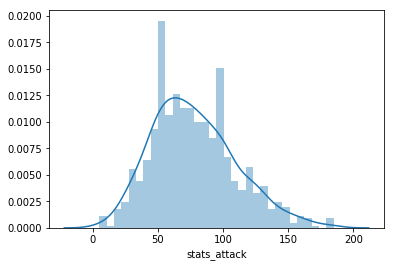

In [465]:
seaborn.distplot(pkmn['stats_attack'], bins=32)

In [533]:
# consolidate pokémon row types
def get_pokemon_of_type(my_type, poke_type):
	if my_type in poke_type:
		return True
	else:
		return False

all_types = [
	'normal',
	'fire',
	'fighting',
	'water',
	'flying',
	'grass',
	'poison',
	'electric',
	'ground',
	'psychic',
	'rock',
	'ice',
	'bug',
	'dragon',
	'ghost',
	'dark',
	'steel',
	'fairy'
]

type_dict = {}
for each_type in all_types:
	type_dict[each_type] = [get_pokemon_of_type(each_type, pkmn_type) for pkmn_type in pkmn['type']]

def get_type(pkmn_type):
	return pkmn[type_dict[pkmn_type]]

In [538]:
# now I can get any type quickly!
get_type('ice')

,pokedex_number,generation,name,japanese_name,classfication,is_legendary,type,abilities,stats_attack,stats_defense,...,stats_special_defense,stats_hp,stats_speed,base_egg_steps,base_happiness,capture_rate,experience_growth,percentage_male,height_m,weight_kg
26,27,1,Sandshrew,Sandサンド,Mouse Pokémon,0,"[ground, ice]","[sand veil, sand rush, snow cloak, slush rush]",75,90,...,35,50,40,5120,70,255,1000000,50.0,NaN,NaN
27,28,1,Sandslash,Sandpanサンドパン,Mouse Pokémon,0,"[ground, ice]","[sand veil, sand rush, snow cloak, slush rush]",100,120,...,65,75,65,5120,70,90,1000000,50.0,NaN,NaN
36,37,1,Vulpix,Rokonロコン,Fox Pokémon,0,"[fire, ice]","[flash fire, drought, snow cloak, snow warning]",41,40,...,65,38,65,5120,70,190,1000000,24.6,NaN,NaN
37,38,1,Ninetales,Kyukonキュウコン,Fox Pokémon,0,"[fire, ice]","[flash fire, drought, snow cloak, snow warning]",67,75,...,100,73,109,5120,70,75,1000000,24.6,NaN,NaN
86,87,1,Dewgong,Jugonジュゴン,Sea Lion Pokémon,0,"[water, ice]","[thick fat, hydration, ice body]",70,80,...,95,90,70,5120,70,75,1000000,50.0,1.7,120.0
90,91,1,Cloyster,Parshenパルシェン,Bivalve Pokémon,0,"[water, ice]","[shell armor, skill link, overcoat]",95,180,...,45,50,70,5120,70,60,1250000,50.0,1.5,132.5
123,124,1,Jynx,Rougelaルージュラ,Humanshape Pokémon,0,"[ice, psychic]","[oblivious, forewarn, dry skin]",50,35,...,95,65,95,6400,70,45,1000000,0.0,1.4,40.6
130,131,1,Lapras,Laplaceラプラス,Transport Pokémon,0,"[water, ice]","[water absorb, shell armor, hydration]",85,80,...,95,130,60,10240,70,45,1250000,50.0,2.5,220.0
143,144,1,Articuno,Freezerフリーザー,Freeze Pokémon,1,"[ice, flying]","[pressure, snow cloak]",85,100,...,125,90,85,20480,35,3,1250000,NaN,1.7,55.4
214,215,2,Sneasel,Nyulaニューラ,Sharp Claw Pokémon,0,"[dark, ice]","[inner focus, keen eye, pickpocket]",95,55,...,75,55,115,5120,35,60,1059860,50.0,0.9,28.0
